![](https://images.ctfassets.net/8x8155mjsjdj/1af9dvSFEPGCzaKvs8XQ5O/a7d4adc8f9573183394ef2853afeb0b6/Copy_of_Red_Wine_Blog_Post_Header.png)

<h2 style="color:#000000;font-size:45px;font-family:Georgia;text-align:center;">🍷<strong style="color:black;font-size:40px;font-family:serif;">RED WINE QUALITY PREDICTION </strong>🍷</h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">In this project,I will be performing <b>Feature Analysis</b>.I think that libraries like matplotlib, seaborn are awesome and necessary for any Data Scientist job.Next i will reduced the dimenstions by using one of the dimensionality reduction technique called PCA. Also, I am creating a model which will help us to predict the <b>"Quality of the red wine"</b>. As the target variable is discrete values, here I will be <b>creating the classification model</b>.Knowing how each variable will impact the red wine quality will help producers, distributors, and businesses in the red wine industry better assess their production, distribution, and pricing strategy.</p>

<h2 style="color:#000000;font-size:45px;font-family:Georgia;text-align:center;">🍷<strong style="color:black;font-size:40px;font-family:serif;">BUSINESS UNDERSTANDING</strong>🍷</h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">The red wine industry shows a recent exponential growth as social drinking is on the rise.Nowadays, industry players are using product quality certifications to promote their products.This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive.Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability.<br>Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like <b>acidity, pH level, sugar, and other chemical properties</b>.The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled.</p>

<h2 style="color:#000000;font-size:45px;font-family:Georgia;text-align:center;">🍷<strong style="color:black;font-size:40px;font-family:serif;">DATA UNDERSTANDING</strong>🍷</h2>


<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">My analysis will use Red Wine Quality Data Set, available on the UCI machine learning repository <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality">https://archive.ics.uci.edu/ml/datasets/wine+quality</a>.This dataset contains a total of <b>12 variables</b>,which were recorded for <b>1,599 observations</b>.</p>

In [1]:

from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----#1e77b3
color_map = ['#cb013a', '#fe6792', '#fe80a4','#fe80a4', '#fe80a4','#ffe6ed']


prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

<h2 style="color:#000000;font-size:45px;font-family:Georgia;text-align:center;">🍷<strong style="color:black;font-size:40px;font-family:Georgia;">WORKFLOW STAGES</strong>🍷</h2>

    
* [Importing The Libraries](#1)
* [Loading & Reading The Dataset](#2)
* [Meta Information Of The Dataset](#3)
* [Finding The Unique Values](#4)
* [Finding The Missing Values ](#5)
* [Finding The Duplicates & Dropping Them](#6)
* [Basics Statistics](#7)
* [Feature Analysis & Also Detecting Outliers](#8)
* [Feature Transfromation & Feature Engineering](#9)
* [Dropping The Redundant Columns](#10)
* [Check The Relatipnship Between The Features](#11)
* [Dimensionality Reduction Using PCA](#12)
* [PCA Implementation](#13)
* [Model Creation](#14)
* [Hyper Parameter Tunning](#15)
* [Final Model](#16)
* [Conclusion](#17)

<a id="1"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>1.Importing The Libraries</b></h2>

In [2]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#Useful machine learning libraries....
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


<a id="2"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>2.Loading & Reading The Libraries</b></h2>

In [4]:
df=pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head().style.background_gradient(cmap='cool')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
#Its always better to have a copy of you dataset.....
df1=df.copy()

<a id="3"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>3.Meta Information Of The Dataset</b></h2>

In [6]:
#The shape of the dataset.....
df.shape

(1599, 12)

In [7]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('-'*100)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  12
----------------------------------------------------------------------------------------------------
Numerical Variables Column:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [8]:
#The dimensions of the dataset.......
df.ndim

2

In [9]:
#index of the dataset
df.index

RangeIndex(start=0, stop=1599, step=1)

In [10]:
#The size of the dataset.......
df.size

19188

In [11]:
#Checking the memory usage w.r.t features...
def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')

In [12]:
k = df.memory_usage()
print(k,'bytes'+'\n')

Index                      80
fixed acidity           12792
volatile acidity        12792
citric acid             12792
residual sugar          12792
chlorides               12792
free sulfur dioxide     12792
total sulfur dioxide    12792
density                 12792
pH                      12792
sulphates               12792
alcohol                 12792
quality                 12792
dtype: int64 bytes



In [13]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
#Actual memory size...
memory_usage = df.memory_usage(deep=True) / 1024 ** 2
print('memory usage of features: \n', memory_usage.head(7))
print('memory usage sum: ',memory_usage.sum())

memory usage of features: 
 Index                  0.000076
fixed acidity          0.012199
volatile acidity       0.012199
citric acid            0.012199
residual sugar         0.012199
chlorides              0.012199
free sulfur dioxide    0.012199
dtype: float64
memory usage sum:  0.1464691162109375


In [15]:
##Memory after reduction....
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

df = reduce_memory_usage(df, verbose=True)

Mem. usage decreased to 0.04 Mb (76.0% reduction)


<a id=""></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>4.Finding The Unique values</b></h2>

In [16]:
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [17]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'quality'}}
multi_table([df_nunique['quality'].style.background_gradient(cmap='cool')])

,quality
5,681
6,638
7,199
4,53
8,18
3,10


<a id="5"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>5.Finding The Missing Values</b></h2>

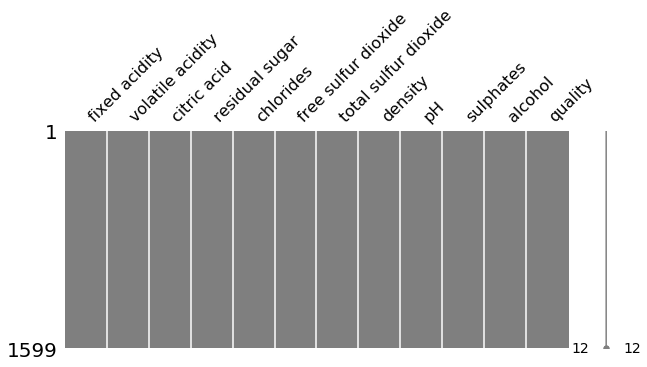

In [18]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0.5,0.5,0.5),figsize = (10,4))

<a id="6"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>6.Finding The Duplicate Values and Dropping Them </b></h2>

In [19]:
#Finding the duplicates from dataset...
df.duplicated().sum()

240

In [20]:
#Removing all the duplicated records
df.drop_duplicates(inplace=True)

<a id="7"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>7.Basic Statistics</b></h2>

In [21]:
# Statistics on Numerical data......
round(df.describe(exclude = 'object'), 2).T.style.background_gradient(cmap='cool')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359,8.31,1.74,4.6,7.1,7.9,9.2,15.9
volatile acidity,1359,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1359,0.27,0.2,0,0.09,0.26,0.43,1
residual sugar,1359,2.52,1.35,0.9,1.9,2.2,2.6,15.5
chlorides,1359,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1359,15.89,10.45,1,7,14,21,72
total sulfur dioxide,1359,46.84,33.41,6,22,38,63,289
density,1359,1,0,0.99,1,1,1,1
pH,1359,3.31,0.16,2.74,3.21,3.31,3.4,4.01
sulphates,1359,0.66,0.17,0.33,0.55,0.62,0.73,2


<a id="8"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>8.Feature Analysis & Also Finding Outliers</b></h2>

Text(0.5, 0.98, 'Distribution Of The Fixed Acidity Before Treating Oultier')

(-0.5, 5.5, 4.03671875, 16.46328125)

(2.7505546910713328, 17.749445308928664, 0.0, 0.3527639334562254)

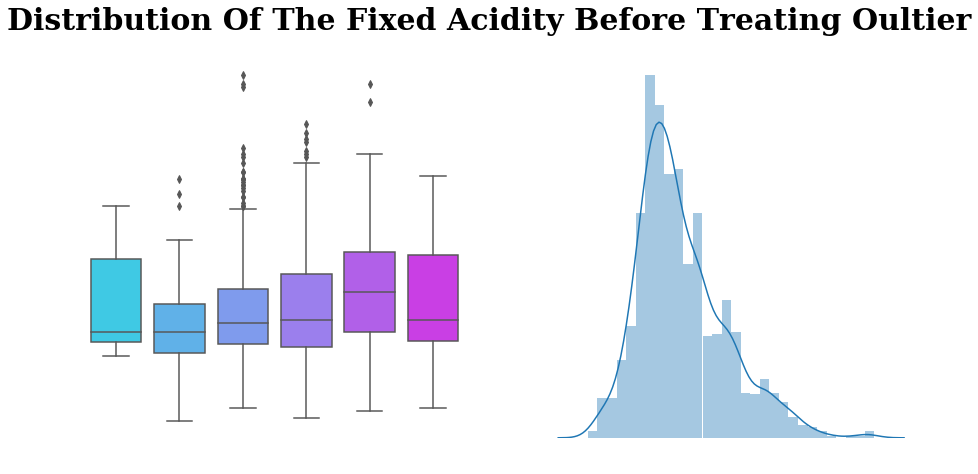

In [22]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Fixed Acidity Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["fixed acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["fixed acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Fixed Acidity After Treating Outlier')

(-0.5, 5.5, 1.464404296875, 2.827587890625)

(1.306024429023654, 2.985967758476346, 0.0, 2.6428443943450284)

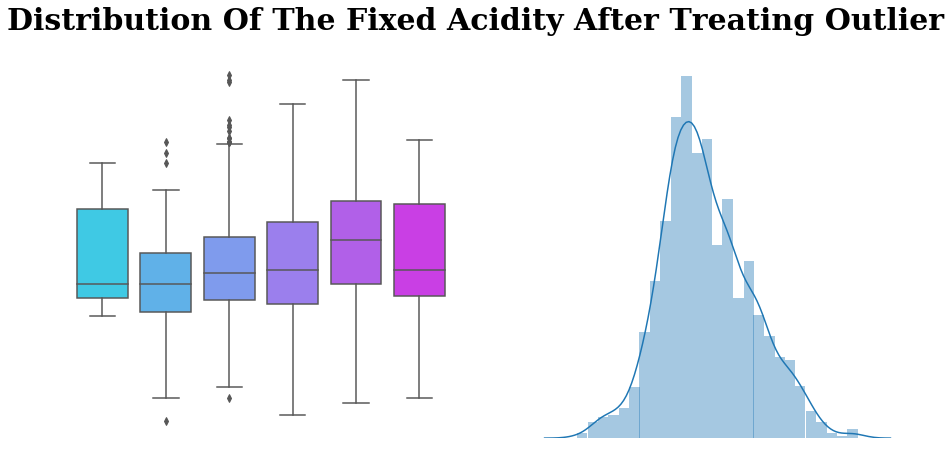

In [23]:
df["Log_fixed acidity"]=np.log(df["fixed acidity"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Fixed Acidity After Treating Outlier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_fixed acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_fixed acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Volatile Acidity Before Treating Oultier')

(-0.5, 5.5, 0.04699096679687499, 1.653082275390625)

(-0.10411271104454947, 1.8041859532320494, 0.0, 2.3735099337748347)

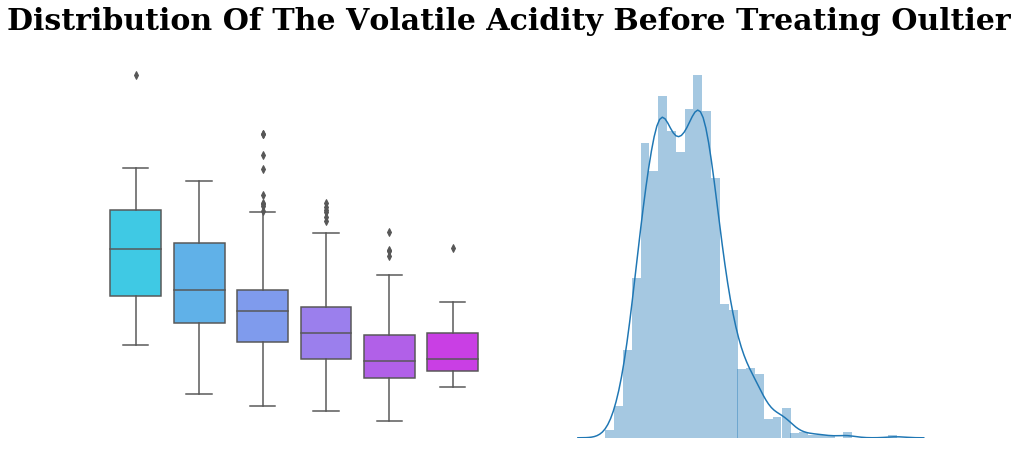

In [24]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Volatile Acidity Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["volatile acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["volatile acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Volatitle After Treating Outliers')

(-0.5, 5.5, -2.2500244140625, 0.5864501953125)

(-2.543741726486141, 0.8801675077361406, 0.0, 1.30412633723892)

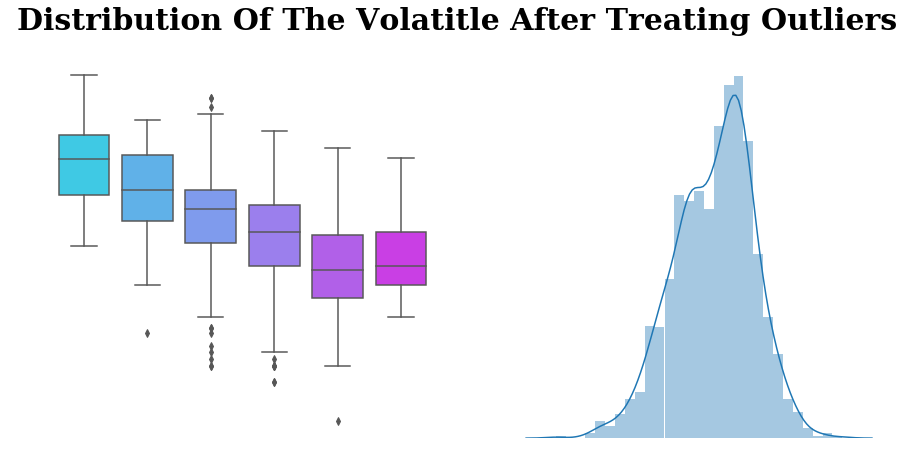

In [25]:
df["Log_volatile acidity"]=np.log(df["volatile acidity"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Volatitle After Treating Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_volatile acidity"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_volatile acidity"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Citric Acidity')

(-0.5, 5.5, -0.05, 1.05)

(-0.21142775252295548, 1.2114277525229553, 0.0, 3.2434686231943792)

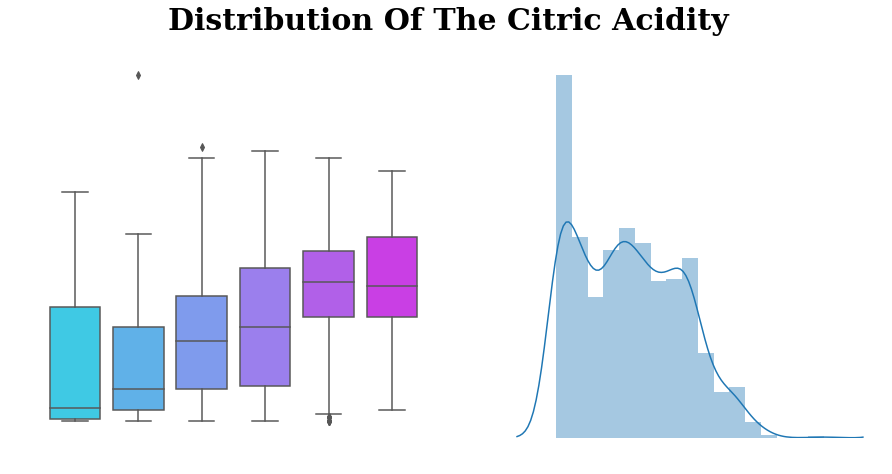

In [26]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Citric Acidity', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["citric acid"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["citric acid"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Residual Sugar Before Treating Oultier')

(-0.5, 5.5, 0.1698974609374999, 16.2300048828125)

(-0.2580270122004764, 16.657929355950476, 0.0, 0.8970121154399875)

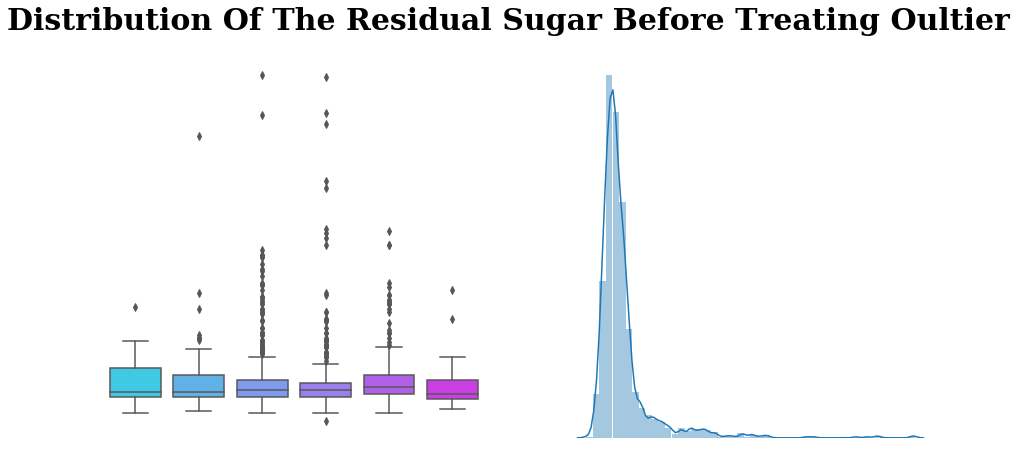

In [27]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Residual Sugar Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["residual sugar"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["residual sugar"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Residual Sugar After Treating Outliers')

(-0.5, 5.5, -0.24775390625000002, 2.88251953125)

(-0.43960272730766825, 3.074368352307668, 0.0, 3.246525081829946)

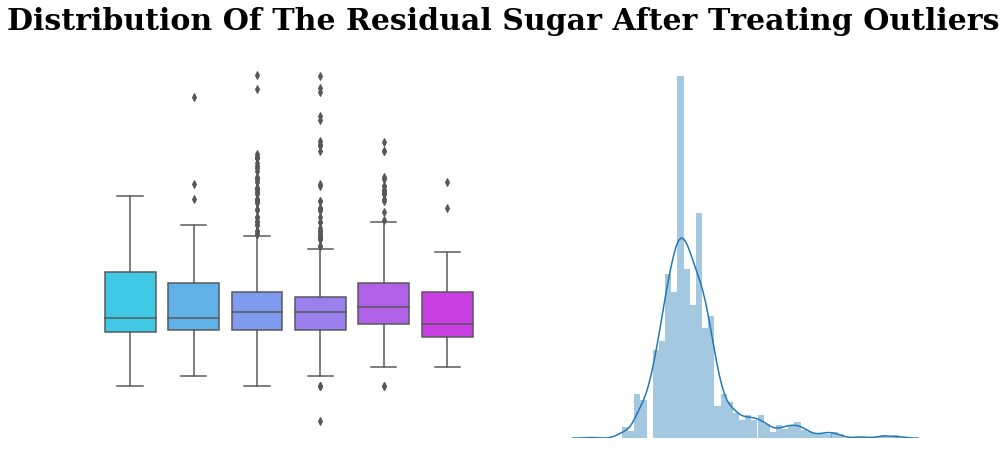

In [28]:
df["Log_residual sugar"]=np.log(df["residual sugar"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Residual Sugar After Treating Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_residual sugar"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_residual sugar"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Chlorides Before Treating Oultier')

(-0.5, 5.5, -0.01794090270996094, 0.6407817840576172)

(-0.030790590101673915, 0.6536314714493301, 0.0, 28.83971100001197)

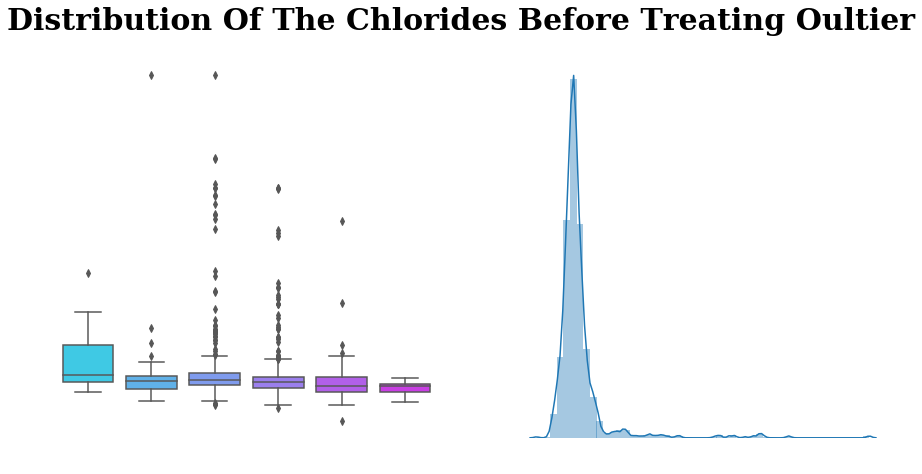

In [29]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Chlorides Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["chlorides"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["chlorides"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Chlorides After Treating Outliers')

(-0.5, 5.5, -4.61832275390625, -0.29647216796875)

(-4.778495601393649, -0.13629932048135093, 0.0, 2.296322618855328)

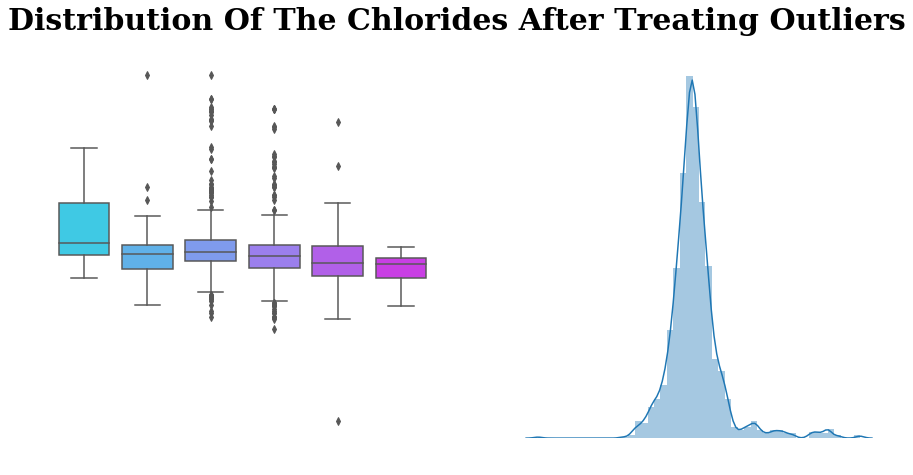

In [30]:
df["Log_chlorides"]=np.log(df["chlorides"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Chlorides After Treating Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_chlorides"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_chlorides"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Free Sulfurdioxide Before Treating Oultier')

(-0.5, 5.5, -2.5500000000000003, 75.55)

(-11.118052020818478, 84.11805202081848, 0.0, 0.07235540133578769)

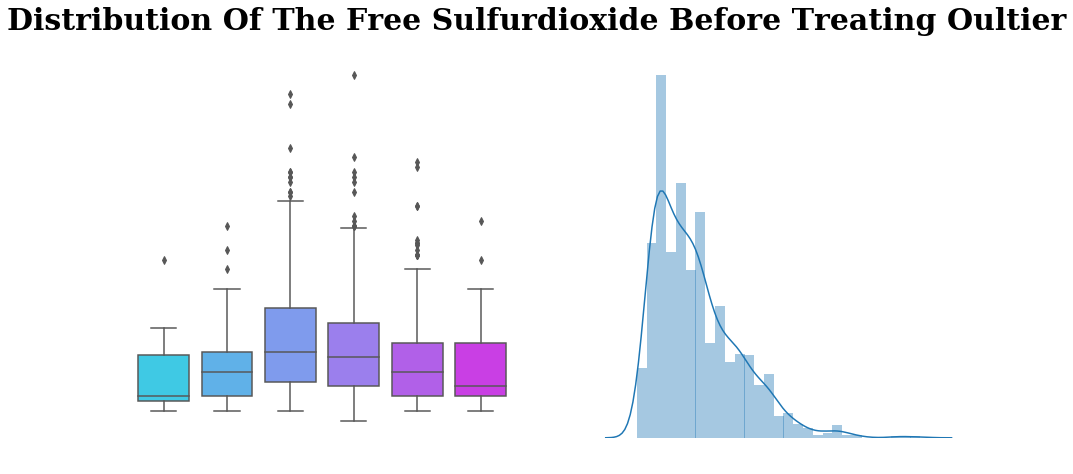

In [31]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Free Sulfurdioxide Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["free sulfur dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["free sulfur dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Free Sulfurdioxide After Treating Outliers')

(-0.5, 5.5, -0.2138671875, 4.4912109375)

(-0.7783983054803494, 5.055742055480349, 0.0, 0.6092008830022075)

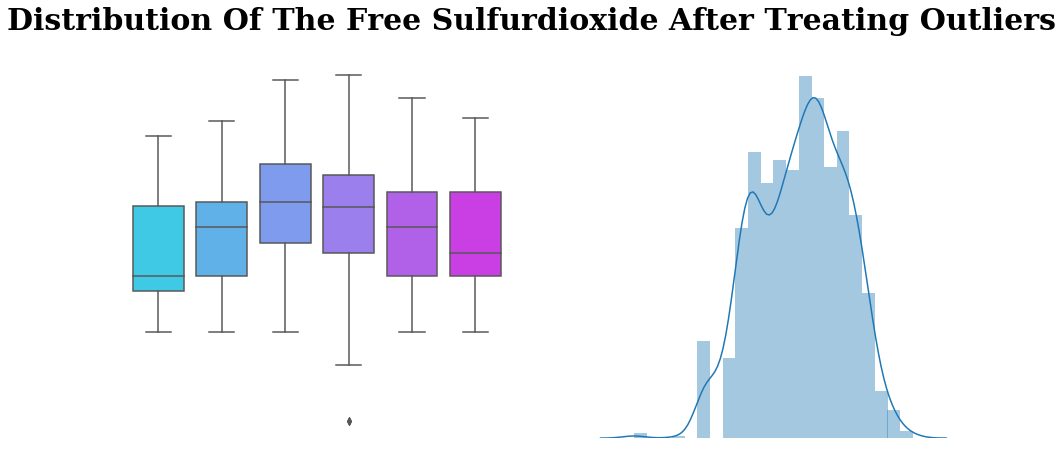

In [32]:
df["Log_free sulfur dioxide"]=np.log(df["free sulfur dioxide"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Free Sulfurdioxide After Treating Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_free sulfur dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_free sulfur dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Total Sulfurdioxide Before Treating Oultier')

(-0.5, 5.5, -8.15, 303.15)

(-33.242152346682694, 328.2421523466827, 0.0, 0.020013449387767713)

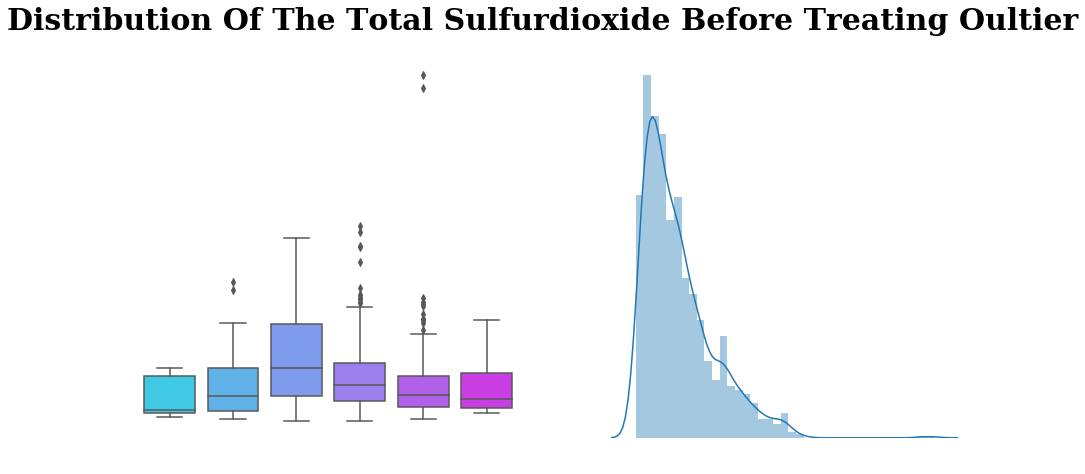

In [33]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Total Sulfurdioxide Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["total sulfur dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["total sulfur dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Total Sulfurdioxide After Treating Outliers')

(-0.5, 5.5, 1.598193359375, 5.861767578125)

(1.0108343252209386, 6.449126612279061, 0.0, 0.5704751946090392)

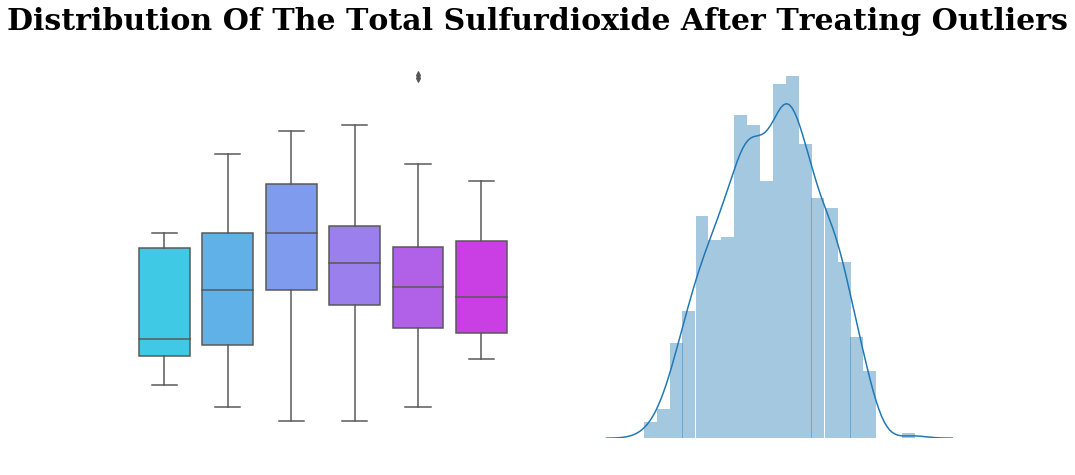

In [34]:
df["Log_total sulfur dioxide"]=np.log(df["total sulfur dioxide"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Total Sulfurdioxide After Treating Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_total sulfur dioxide"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_total sulfur dioxide"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Density')

(-0.5, 5.5, 0.98955078125, 1.00458984375)

(0.9880566315532892, 1.0060839934467107, 0.0, 270.5801324503311)

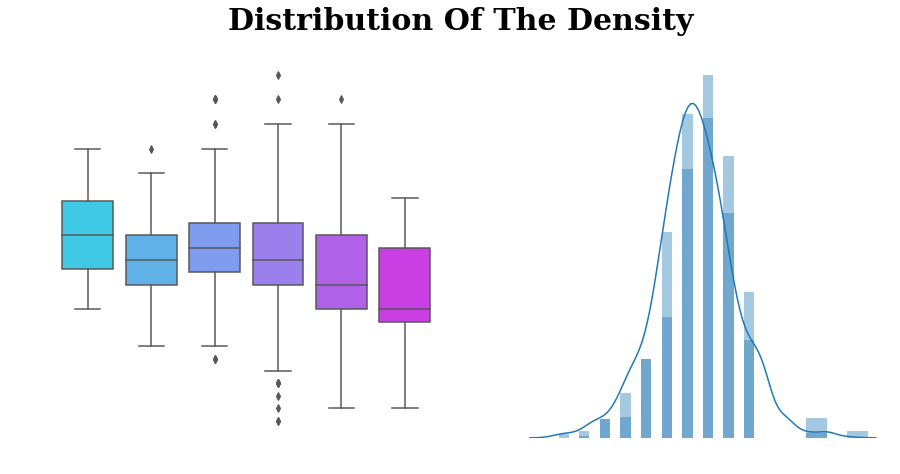

In [35]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Density', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["density"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["density"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The pH')

(-0.5, 5.5, 2.67666015625, 4.07529296875)

(2.560714139785241, 4.19123898521476, 0.0, 3.443916374496818)

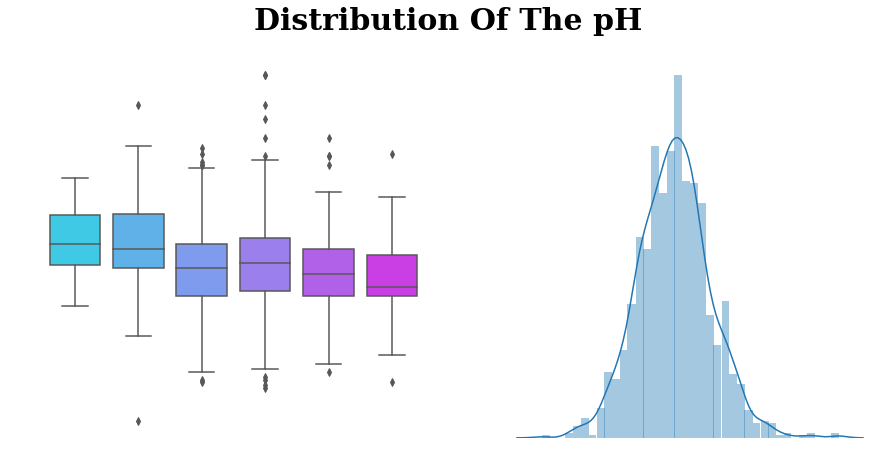

In [36]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The pH', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["pH"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["pH"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Sulphates Before Treating Oultier')

(-0.5, 5.5, 0.24658203125, 2.08349609375)

(0.1363137836327421, 2.193764341367258, 0.0, 4.38010045749752)

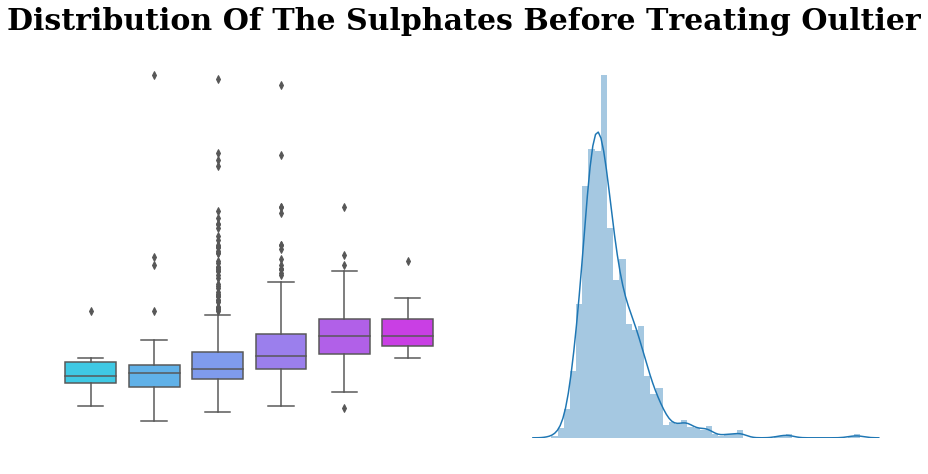

In [37]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Sulphates Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["sulphates"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["sulphates"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Sulphates After Treating Outliers')

(-0.5, 5.5, -1.198486328125, 0.783447265625)

(-1.3719571079131252, 0.9569180454131252, 0.0, 2.4510756178851234)

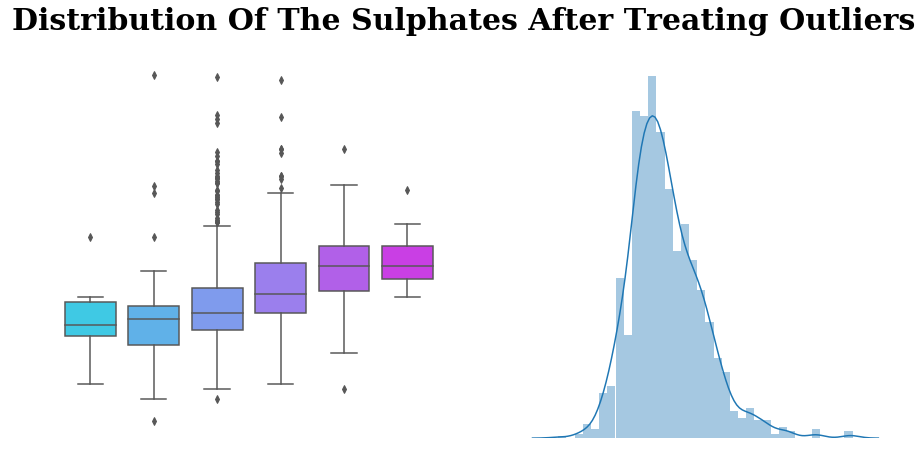

In [38]:
df["Log_sulphates"]=np.log(df["sulphates"])

plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Sulphates After Treating Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_sulphates"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_sulphates"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Alcohol Before Treating Oultier')

(-0.5, 5.5, 8.0734375, 15.2234375)

(7.180173720249291, 16.11670127975071, 0.0, 0.7115035565366691)

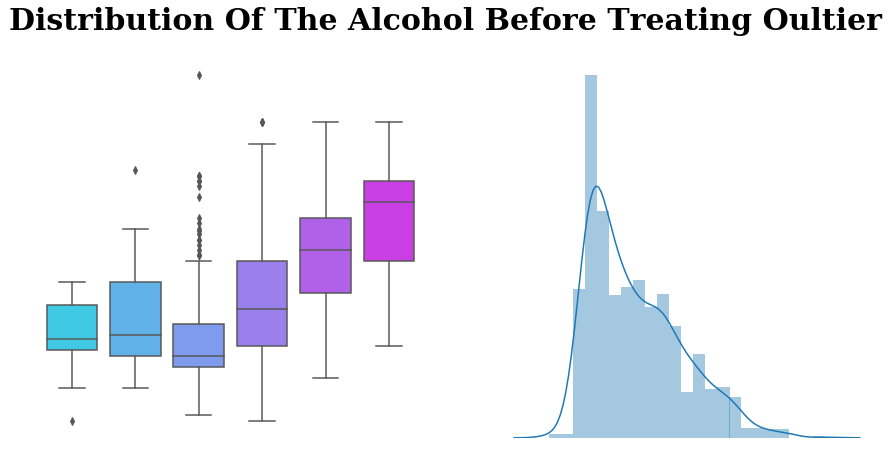

In [39]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Alcohol Before Treating Oultier', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["alcohol"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["alcohol"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

Text(0.5, 0.98, 'Distribution Of The Alcohol After Treating Outliers')

(-0.5, 5.5, 2.10029296875, 2.72978515625)

(2.0175416446381322, 2.8125364803618678, 0.0, 7.177041942604856)

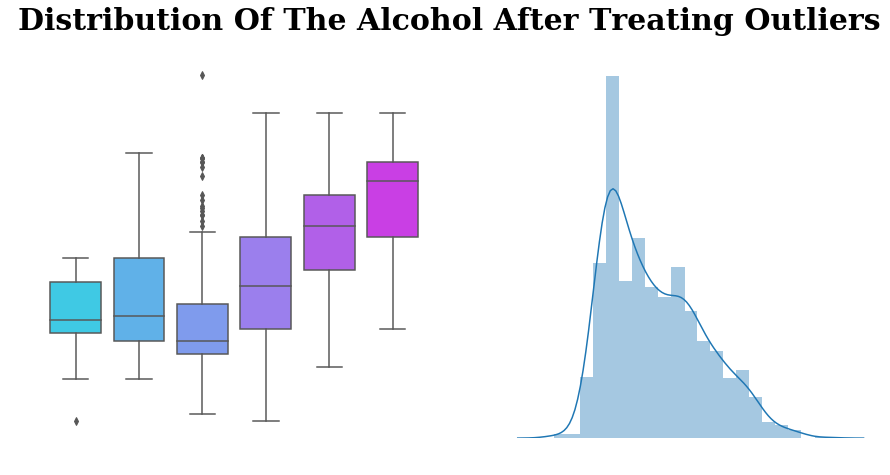

In [40]:
df["Log_alcohol"]=np.log(df["alcohol"])
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Distribution Of The Alcohol After Treating Outliers', fontsize=30, fontweight='bold')

ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(x=df["quality"], y=df["Log_alcohol"],palette="cool")
plt.axis('off')

ax2 = fig.add_subplot(122)
x=df["Log_alcohol"]
ax2 = sns.distplot(x)
plt.axis('off')
plt.show()

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">In the Above charts, I have detected the outlier using boxplot and distribution charts. I have used log transformation terminology to handle the outliers.</p>

<a id="9"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>9.Feature Engineering & Feature Transformation</b></h2>

Text(0.5, 0.98, 'Before-Distribution Of The Quality')

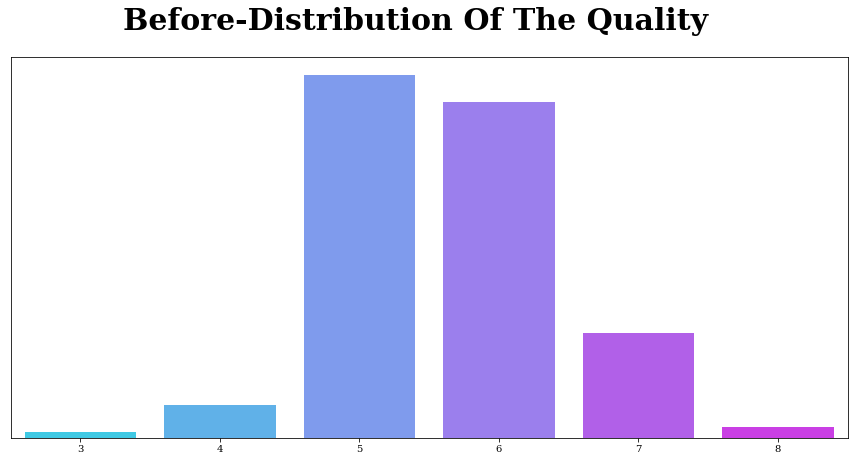

In [41]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('Before-Distribution Of The Quality', fontsize=30, fontweight='bold')
ax = sns.barplot(y = df['quality'].value_counts().values.tolist(), 
                      x = df['quality'].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show()

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">Doing feature transformation just to convert the target dataset into binary classification.</p>


In [42]:
#Feature Engineering...
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

#Feature Transformation...
df['quality'].replace({'bad':0, 'good':1}, inplace=True)

Text(0.5, 0.98, 'After-Distribution Of The Quality')

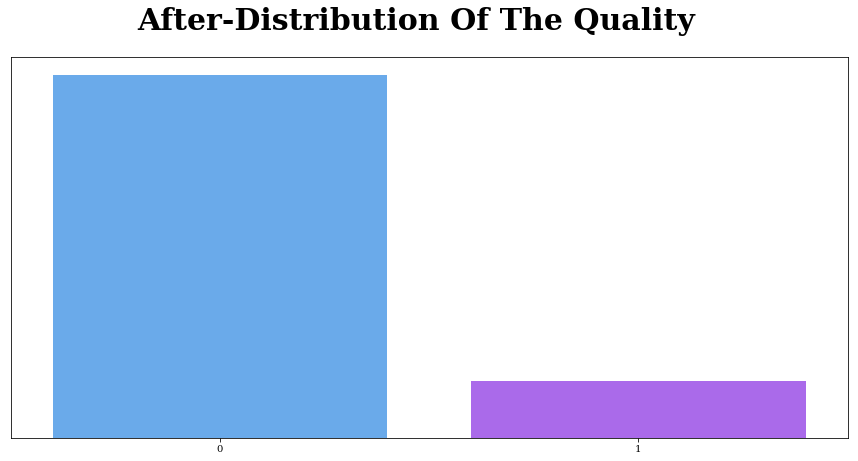

In [43]:
plt.rcParams['font.family'] = ['serif']
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
fig.suptitle('After-Distribution Of The Quality', fontsize=30, fontweight='bold')

ax = sns.barplot(y = df['quality'].value_counts().values.tolist(), 
                      x = df['quality'].value_counts().index, palette="cool")
ax.get_yaxis().set_visible(False)
plt.show()

<a id="10"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>10.Dropping The Redundant Columns</b></h2>

In [44]:
df.drop(columns = ['fixed acidity', 'volatile acidity','residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','sulphates', 'alcohol'],axis=True,inplace =True)

In [45]:
#Rearrangement of the columns......
df = df[['Log_fixed acidity','Log_volatile acidity','citric acid', 'Log_residual sugar', 'Log_chlorides',
       'Log_free sulfur dioxide', 'Log_total sulfur dioxide','density',
       'pH','Log_sulphates','Log_alcohol','quality']]

In [46]:
df.head().style.background_gradient(cmap='cool')

,Log_fixed acidity,Log_volatile acidity,citric acid,Log_residual sugar,Log_chlorides,Log_free sulfur dioxide,Log_total sulfur dioxide,density,pH,Log_sulphates,Log_alcohol,quality
0,2.00195,-0.356445,0,0.64209,-2.57812,2.39844,3.52539,0.997559,3.50977,-0.57959,2.24023,0
1,2.05469,-0.12793,0,0.955566,-2.32227,3.21875,4.20312,0.996582,3.19922,-0.385498,2.28125,0
2,2.05469,-0.274658,0.0400085,0.833008,-2.38672,2.70898,3.98828,0.99707,3.25977,-0.430908,2.28125,0
3,2.41602,-1.27246,0.560059,0.64209,-2.58984,2.83398,4.09375,0.998047,3.16016,-0.544434,2.28125,0
5,2.00195,-0.415283,0,0.587891,-2.58984,2.56445,3.68945,0.997559,3.50977,-0.57959,2.24023,0


<a id="11"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>11.Checking The Relationship Between The Features</b></h2>

<Figure size 1080x504 with 0 Axes>

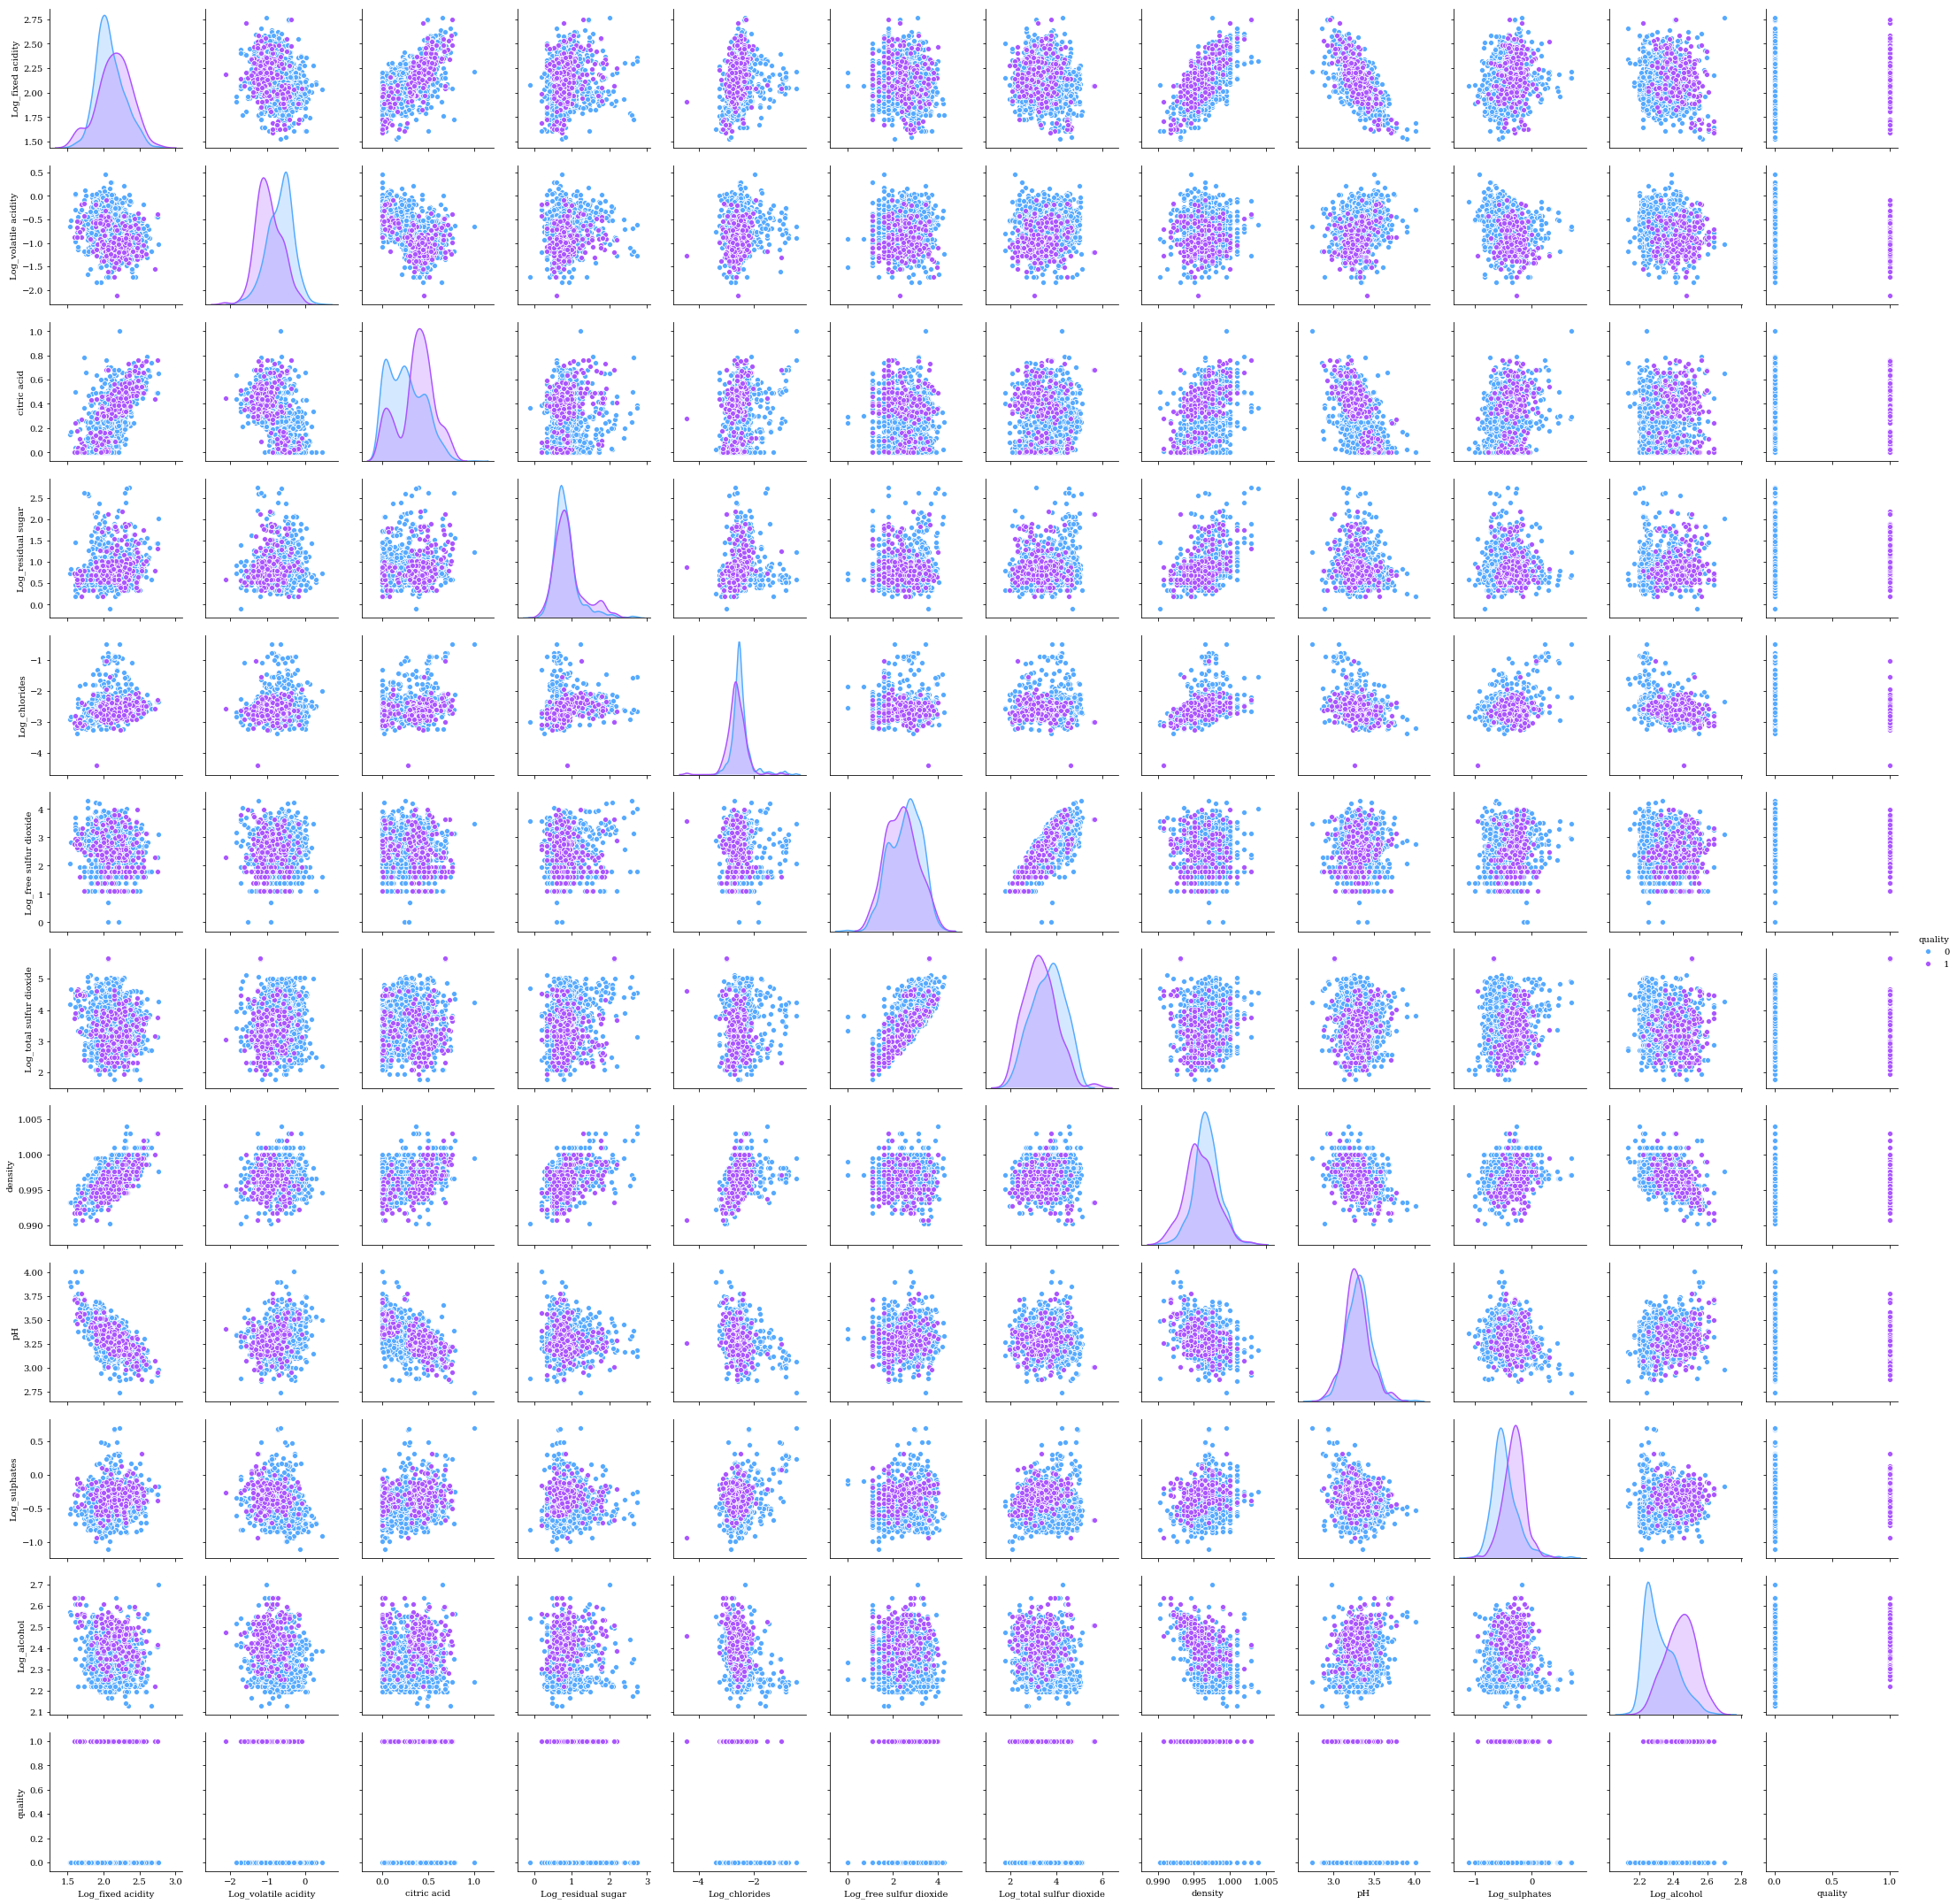

In [47]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
sns.pairplot(df,hue='quality',palette="cool")

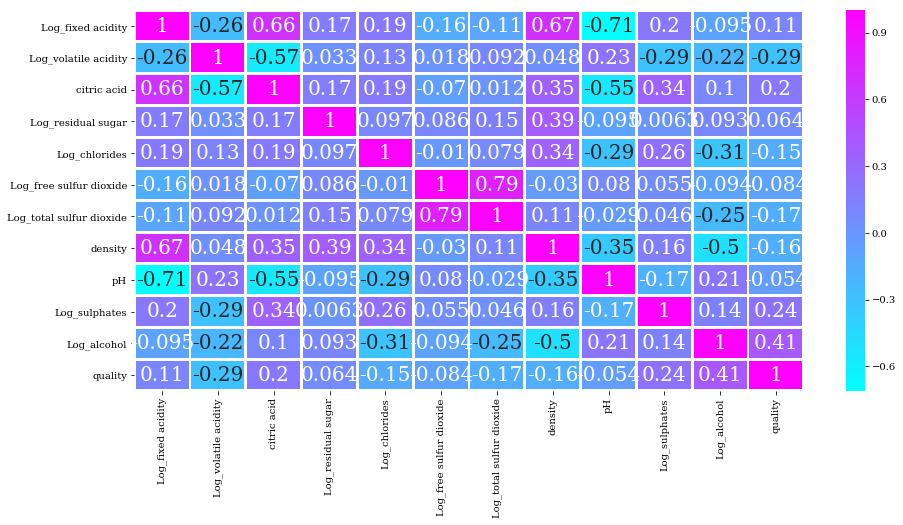

In [48]:
background_color = "#ffffff"
fig = plt.figure(figsize=(15,7), facecolor=background_color)
sns.heatmap(df.corr(), annot=True,cmap = "cool",linewidths=2,linecolor = "white",cbar=True,annot_kws={"size":20})

Text(-1.1, 1.25, 'Correlation of Numerical Features with Target')

Text(0, 0.5, '')

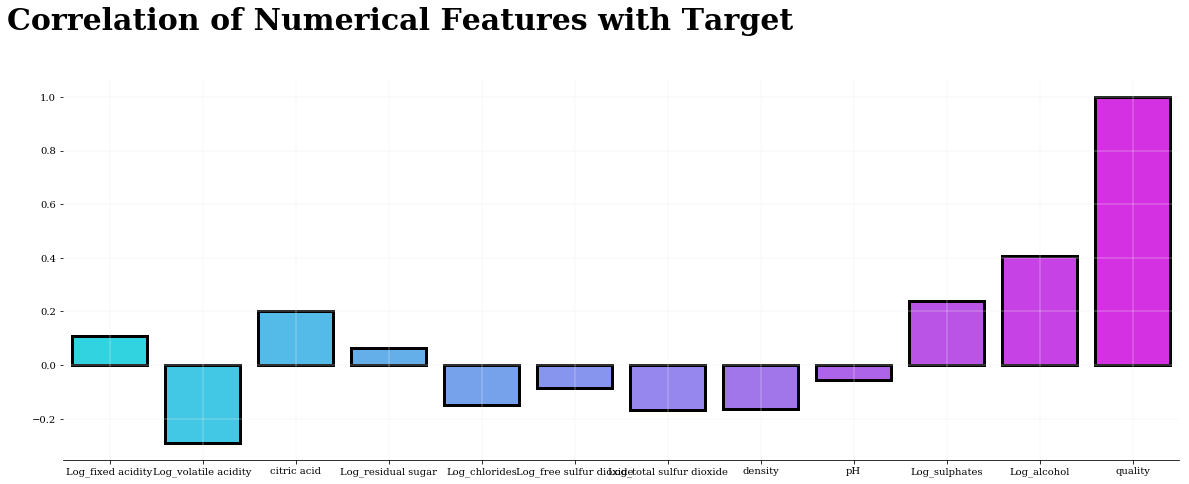

In [49]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=30, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['quality']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, palette='cool',edgecolor="black",linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

<a id="12"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>12.Dimensionality Reduction Using PCA</b></h2>

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.<br>Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.<br>
<b>How It works?</b><br>
Step 1: Standardization.<br>
Step 2: Covariance Matrix computation.<br>
Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components.<br>
Step 4: Feature vector.<br>
Step 5: Recast the data along the principal components axes.<br>
For more information:- https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2)</p>

![](https://miro.medium.com/max/462/1*QALwLkPJG45E7_DsOccdaw.png)

<a id="13"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>13.PCA Implementaion</b></h2>

In [50]:
#Feature Variables
x = df.drop('quality',axis=1)
#Target Variable
Y = df['quality']

x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.25,random_state=44)

In [51]:
# Applying PCA FOR DIMENSIONALITY REDUCTION......
pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[5.85641653e-01 1.08642263e-01 9.85154543e-02 7.64769047e-02
 6.04299870e-02 2.88552593e-02 2.50095490e-02 7.60944592e-03
 4.80496701e-03 4.01420425e-03 3.12261229e-07]


In [52]:
len(explained_variance)

11

In [53]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.5856416532823628, 0.10864226287909255, 0.09851545429655259, 0.07647690474821395, 0.0604299870497445, 0.028855259327970485, 0.025009548971263548, 0.007609445922171323, 0.004804967010158156, 0.004014204251241388, 3.1226122865626945e-07]


<BarContainer object of 11 artists>

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Components')

Text(0.5, 1.0, 'Explained Variance Ration vs Principal Components')

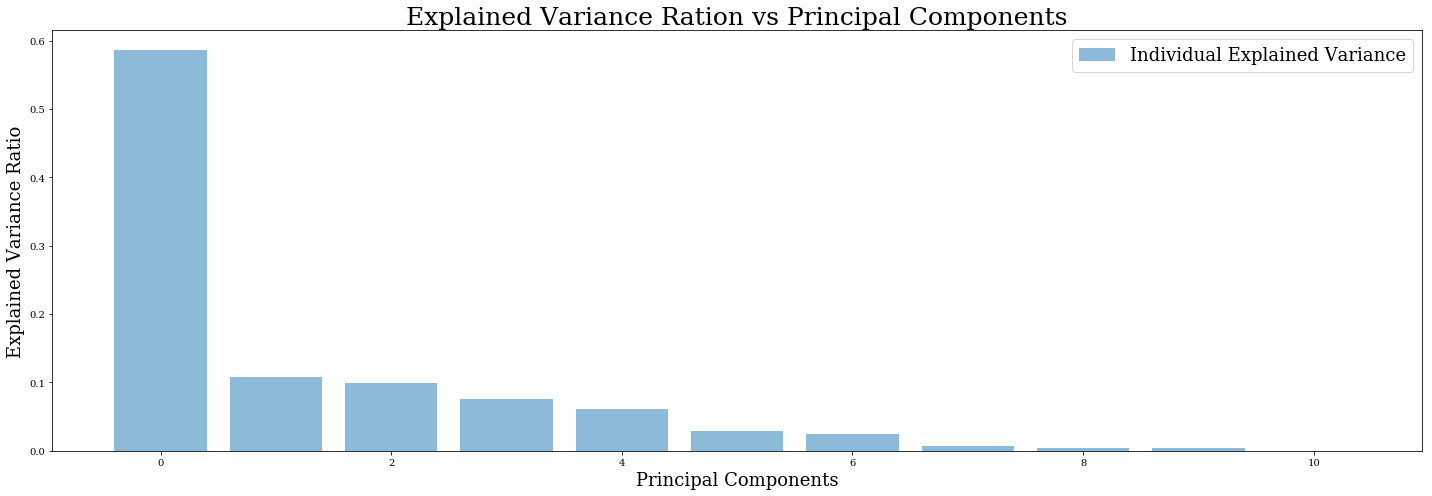

In [54]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(11), explained_variance, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 18)
plt.xlabel('Principal Components',fontsize = 18)
plt.title('Explained Variance Ration vs Principal Components',fontsize = 25)
plt.legend(loc='best',fontsize = 18)
#plt.axis("off")
plt.tight_layout()
plt.show()

<p style= "border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;"><b>I am selecting the top 5 features,You can choose you own top no. of features.</b></p>

In [55]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.58564165 0.10864226 0.09851545 0.0764769  0.06042999]


<a id="14"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>14.Model Creation</b></h2>

Text(0.5, 0, 'Mean Accuracy')

<Figure size 1080x504 with 0 Axes>

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.848846        0.020138  RandomForestClassifier
1              0.854820        0.015563      AdaBoostClassifier
2              0.862602        0.014184       Gradient Boosting
3              0.803685        0.011787  DecisionTreeClassifier


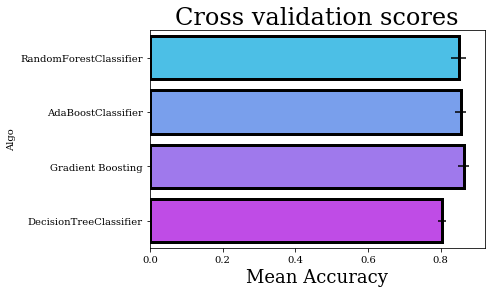

<Figure size 1080x504 with 0 Axes>

In [56]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, x_train, Y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'DecisionTreeClassifier']})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},palette='cool',edgecolor="black",linewidth=3)
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (15,7))
print(cv_df)

<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;"><b>Ada boosting is the winner.</b></p>

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, Y_train)
Y_pred = dtc.predict(x_test)
confusion_matrix(Y_test, Y_pred)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

array([[254,  39],
       [ 31,  16]])

In [58]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       293
           1       0.29      0.34      0.31        47

   micro avg       0.79      0.79      0.79       340
   macro avg       0.59      0.60      0.60       340
weighted avg       0.81      0.79      0.80       340



In [59]:
print(accuracy_score(Y_test, Y_pred))

0.7941176470588235


<a id="15"></a>
<h2 style="border-style:outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>15.Hyper Parameter Tunning</b></h2>

In [60]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 10], 'min_samples_split': range(2, 10), 'min_samples_leaf': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [61]:
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(x_test)  

In [62]:
print(accuracy_score(Y_test, Y_pred))

0.8647058823529412


In [63]:
# best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8557409224730128


In [64]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(x_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.8min finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 70, 90, 120, 180, 200], 'learning_rate': [0.001, 0.01, 0.1, 1, 10], 'algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [65]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 90}
0.8684985279685966


<a id="15"></a>
<h2 style="border-style: outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>16.Final Model</b></h2>

In [66]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm= "SAMME", learning_rate= 0.1, n_estimators= 90)
ada.fit(x_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=90, random_state=None)

In [67]:
print(confusion_matrix(Y_test, Y_pred))

[[291   2]
 [ 44   3]]


In [68]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       293
           1       0.60      0.06      0.12        47

   micro avg       0.86      0.86      0.86       340
   macro avg       0.73      0.53      0.52       340
weighted avg       0.83      0.86      0.81       340



In [69]:
print(accuracy_score(Y_test, Y_pred))

0.8647058823529412


<a id="17"></a>
<h2 style="border-style:outset;color:black;font-size:25px;font-family:Georgia;text-align:left;"><b>17.Conclusion</b></h2>
<p style="border-style:outset;font-family:Georgia;color:#03051a;font-size:110%;text-align:left;">Since the dataset is an imbalanced dataset I tried using only tree-based algorithms like Ada boost, Decision tree, Random forest tree, etc.<br>
The advantages of any tree-based algorithm are - it is specialized in working with the imbalanced dataset.<br>
For this prediction ada boosting classification is giving use a very good accuracy i,e <b>87%</b>
Meanwhile, you can use your favorite classification model and get good accuracy.<br>
Please share your feedback through comments and let me know how to improve model performance, visualization, or something in this kernel.<br>
<b>If you like please upvote.</b><br>
<b>If you fork please upvote.</b></p>